In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Configurations
file_path = r'C:\Users\Admin\prudential-life-insurance-assessment.xlsx'
file_path_test = r'C:\Users\Admin\test.csv'

In [1]:
#Read the input
df=pd.read_excel(file_path,sheet_name='train')

NameError: name 'pd' is not defined

In [13]:
#Load the Test Data
df_test=pd.read_csv(file_path_test)

In [16]:
#Create a copy of train data
customer_data=df.copy()

In [21]:
#Getting the list of columns with more than 50 percent missing values.
Missing_col_list=customer_data.columns[customer_data.isnull().mean()>=0.5].to_list()

In [22]:
#these columns have more than 50 percent null values
Missing_col_list

['Family_Hist_3',
 'Family_Hist_5',
 'Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

In [23]:
#We shall drop these columns in both training and test set
customer_data=customer_data.drop(Missing_col_list,axis=1)
df_test=df_test.drop(Missing_col_list,axis=1)

In [27]:
#Now lets re-engineer the other null value columns.
Missing_col_list_train=customer_data.columns[customer_data.isnull().any() == True].to_list()
Missing_col_list_test=df_test.columns[df_test.isnull().any() == True].to_list()

In [28]:
Missing_col_list_train

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_4',
 'Medical_History_1']

In [29]:
Missing_col_list_test

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_4',
 'Medical_History_1']

Both train and test sets have missing values in the same columns.Lets apply feature engineering on train set and propagate the same to test set.

In [32]:
def univariate_dist(columns):
    fig, axes = plt.subplots(2,2, figsize=(20,10)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    sns.distplot( ax=axes[0,0],x=customer_data[columns[0]],hist=True)
    axes[0,0].set_title(columns[0])
    if len(columns)>1:
        sns.distplot( ax=axes[0,1],x=customer_data[columns[1]],hist=True)
        axes[0,1].set_title(columns[1])
    if len(columns)>2:
        sns.distplot( ax=axes[1,0],x=customer_data[columns[2]],hist=True)
        axes[1,0].set_title(columns[2])
    if len(columns)>3:
        sns.distplot( ax=axes[1,1],x=customer_data[columns[3]],hist=True)
        axes[1,1].set_title(columns[3])

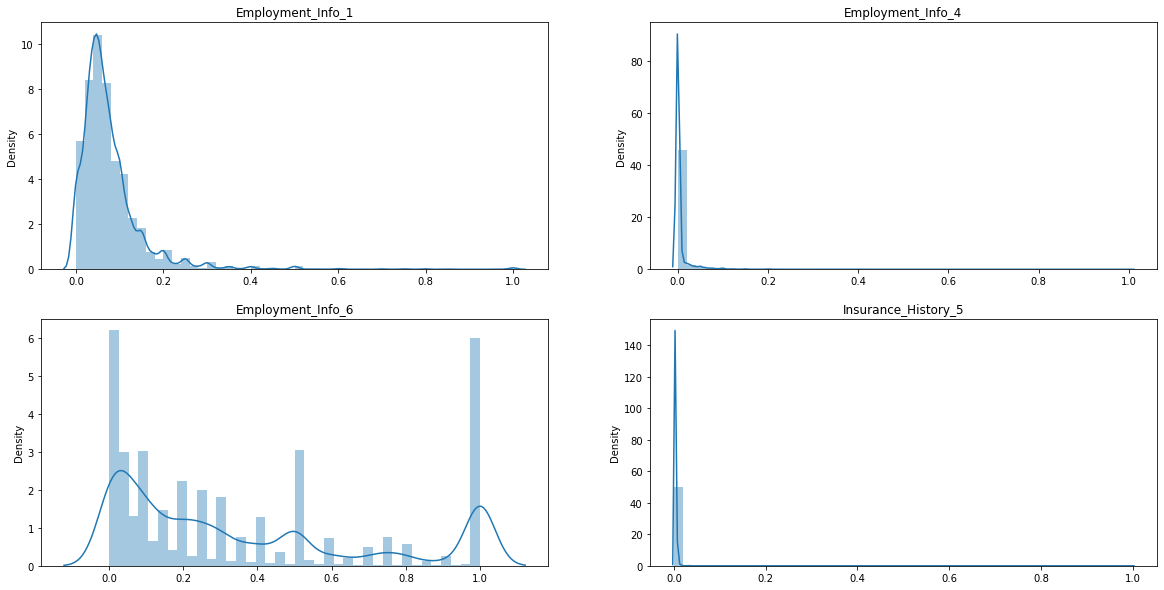

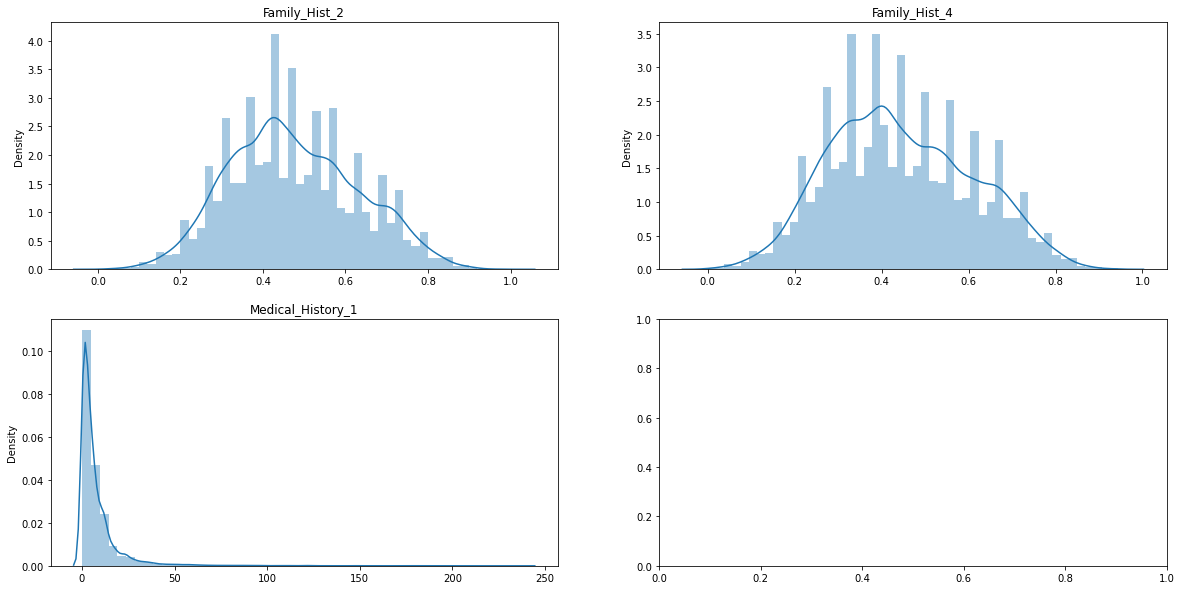

In [33]:
#visualization of identified columns to fill in missing values.
temp=0
length=len(Missing_col_list_train)
if (length%4 == 0):
    condition=length+1
else:
    condition=(length+(4-(length%4)))+1
for i in range(4,condition,4):
    if i<length:
        univariate_dist(Missing_col_list_train[temp:i])
    else:
        univariate_dist(Missing_col_list_train[temp:length])
    temp=i

In [34]:
#Filling the NA values with mean of the specific column in both train and test
for column in Missing_col_list_train:
    Mean=customer_data[column].mean()
    customer_data[column].fillna(Mean, inplace=True)
    df_test[column].fillna(Mean, inplace=True)

In [37]:
#Lets convert one categorical column(Product_Info_2) to numeric
#Trying to use monotonicity encoding technique
def CategoricalImputation_Monotonicity(X_train,X_test,variable,target_variable):
    ordered_labels=X_train.groupby([variable])[target_variable].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 1)}
    X_train[variable+'_ordered']=X_train[variable].map(ordinal_label)
    X_test[variable+'_ordered']=X_test[variable].map(ordinal_label)

In [40]:
CategoricalImputation_Monotonicity(customer_data,df_test,'Product_Info_2','Response')

In [41]:
customer_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_ordered
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,8,9
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,4,13
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,8,14
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,8,16
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,8,6


<AxesSubplot:xlabel='Response', ylabel='Product_Info_4'>

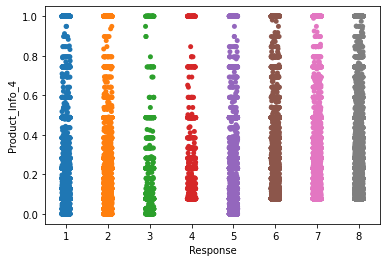

In [49]:
sns.stripplot(x=customer_data.Response,y=customer_data.Product_Info_4)

In [62]:
numeric_columns=customer_data.columns[customer_data.dtypes=='float64'].tolist()
discrete_columns=customer_data.columns[customer_data.dtypes=='int64'].tolist()

In [65]:
discrete_columns.remove('Id')

Visualization of continuous numeric variables.

In [90]:
def display_plots(func,cols,target):
    temp=0
    length=len(cols)
    if (length%4 == 0):
        condition=length+1
    else:
        condition=(length+(4-(length%4)))+1
    for i in range(4,condition,4):
        if i<length:
            func(cols[temp:i],target)
        else:
            func(cols[temp:length],target)
        temp=i

In [67]:
def bivariate_stripplot(columns,target):
    fig, axes = plt.subplots(2,2, figsize=(20,10)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    sns.stripplot(ax=axes[0,0],x=target , y = columns[0], data = customer_data)
    axes[0,0].set_title(columns[0])
    if len(columns)>1:
        sns.stripplot( ax=axes[0,1],x=target , y = columns[1], data = customer_data)
        axes[0,1].set_title(columns[1])
    if len(columns)>2:
        sns.stripplot( ax=axes[1,0],x=target , y = columns[2], data = customer_data)
        axes[1,0].set_title(columns[2])
    if len(columns)>3:
        sns.stripplot( ax=axes[1,1],x=target , y = columns[3], data = customer_data)
        axes[1,1].set_title(columns[3])

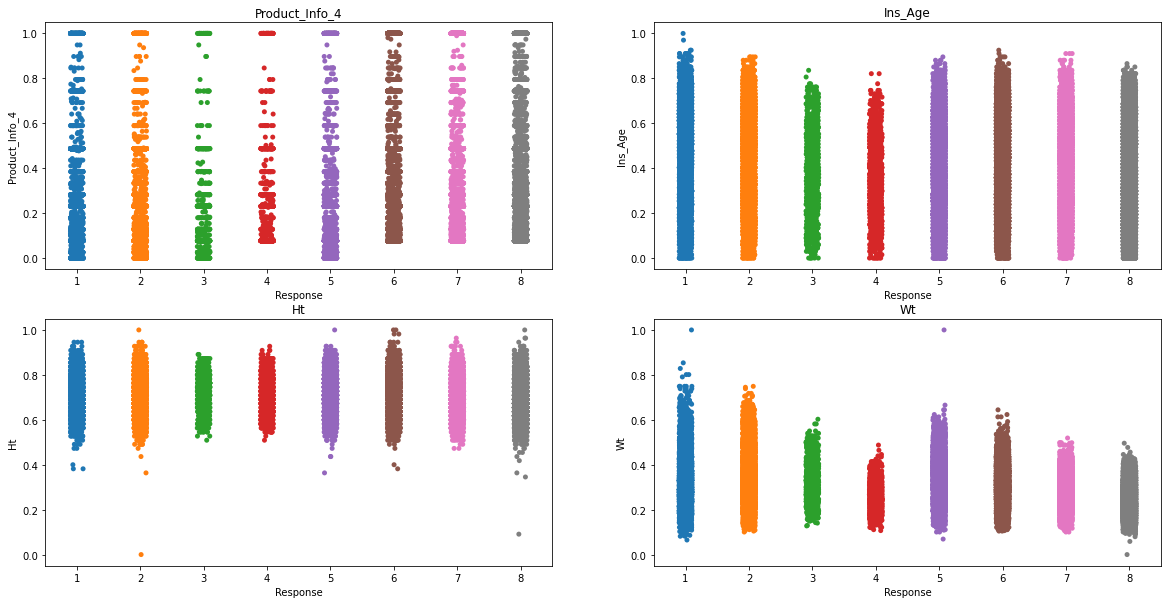

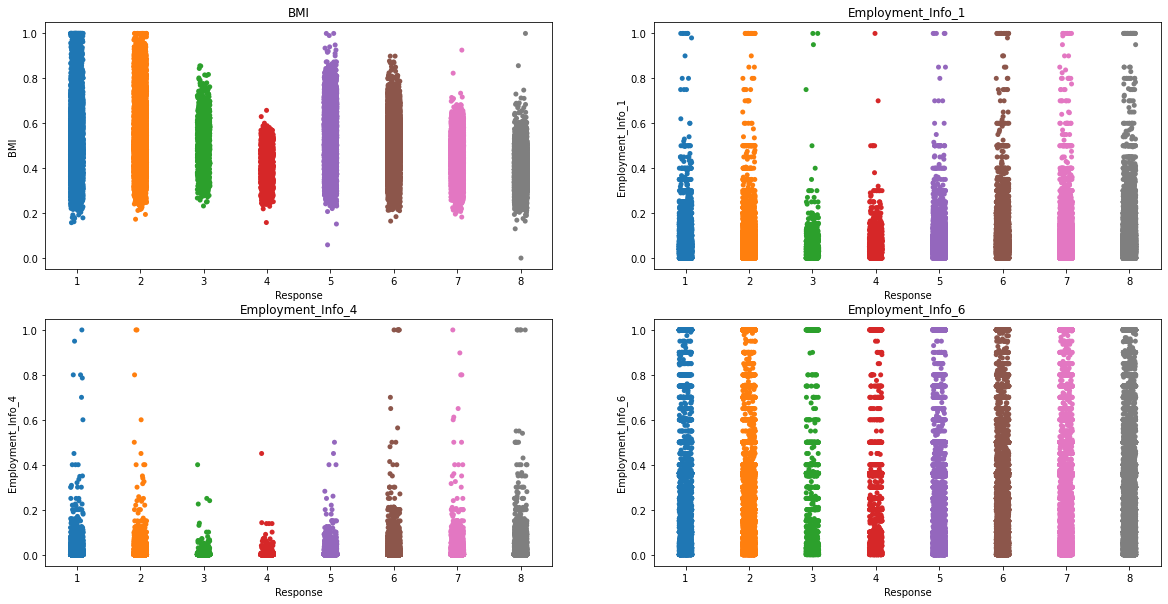

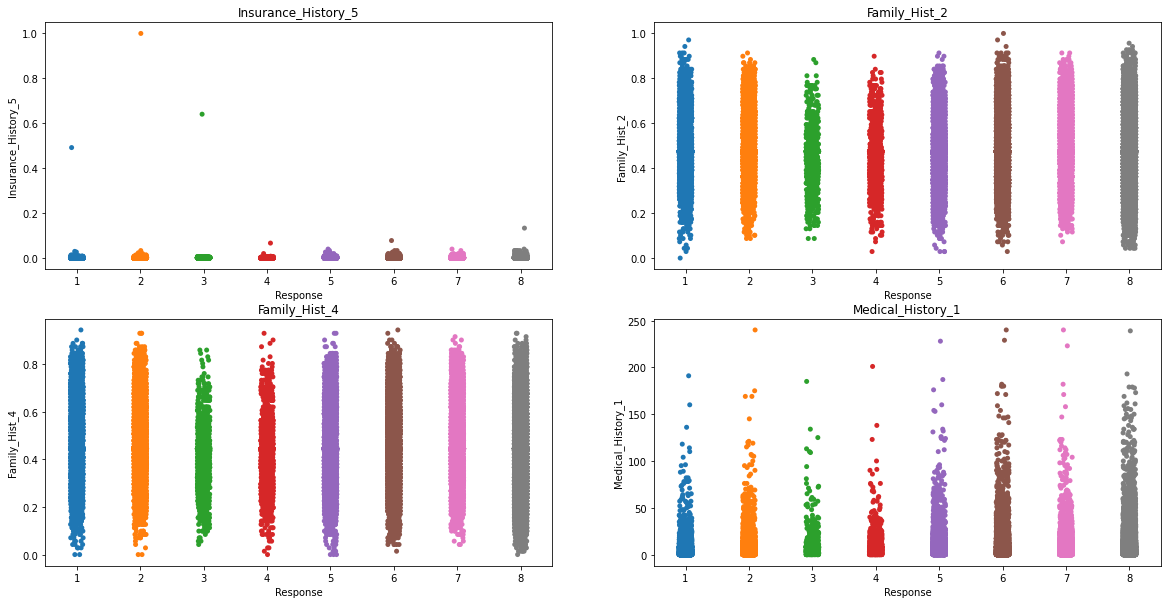

In [92]:
display_plots(bivariate_stripplot,numeric_columns,'Response')

Visualization of discrete continuous variables.

In [70]:
def bivariate_count(columns,target):
    fig, axes = plt.subplots(2,2, figsize=(20,15)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    axes[0,0].tick_params('x', labelrotation=90)
    sns.countplot(ax=axes[0,0],x=columns[0], hue=target, data = customer_data)
    if len(columns)>1:
        axes[0,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[0,1],x = columns[1],hue=target, data = customer_data)
    if len(columns)>2:
        axes[1,0].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,0],x = columns[2],hue=target, data = customer_data)
    if len(columns)>3:
        axes[1,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,1],x = columns[3],hue=target, data = customer_data)
    

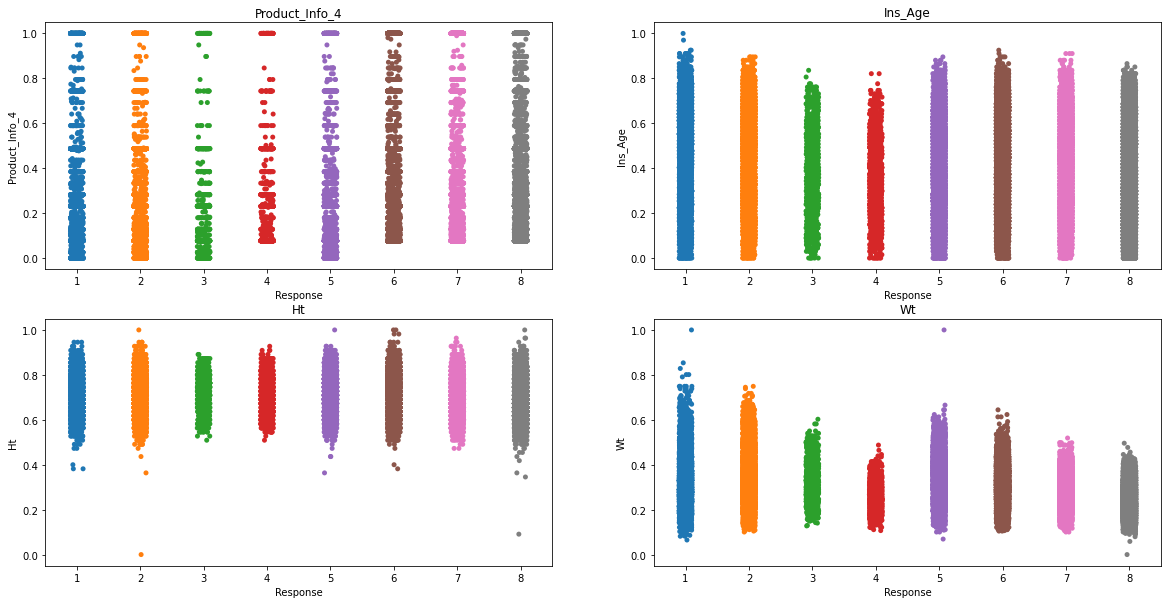

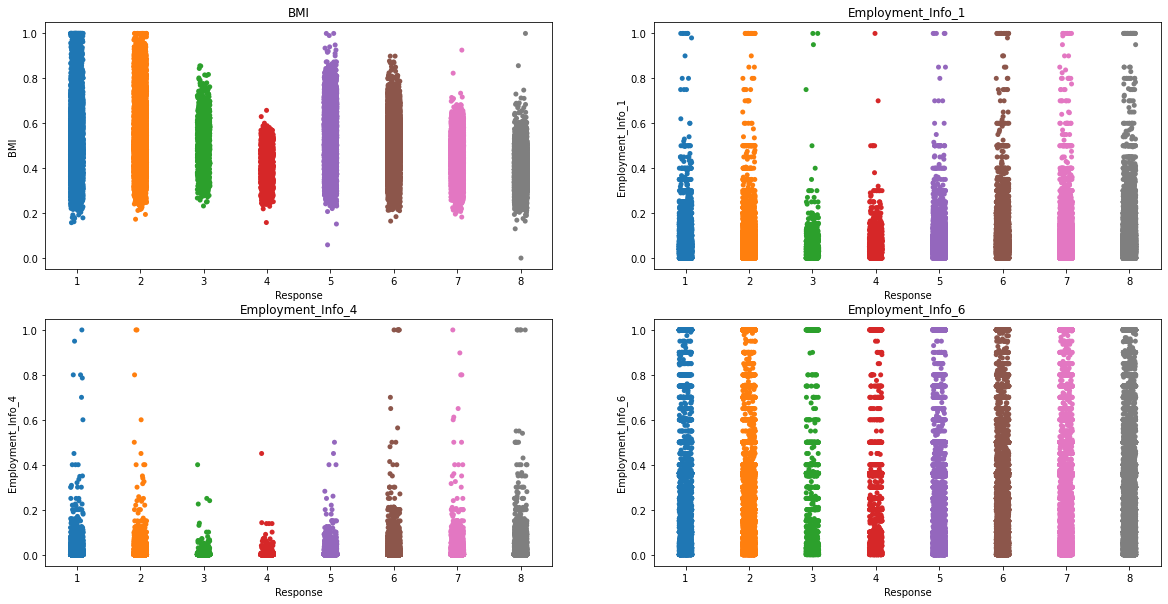

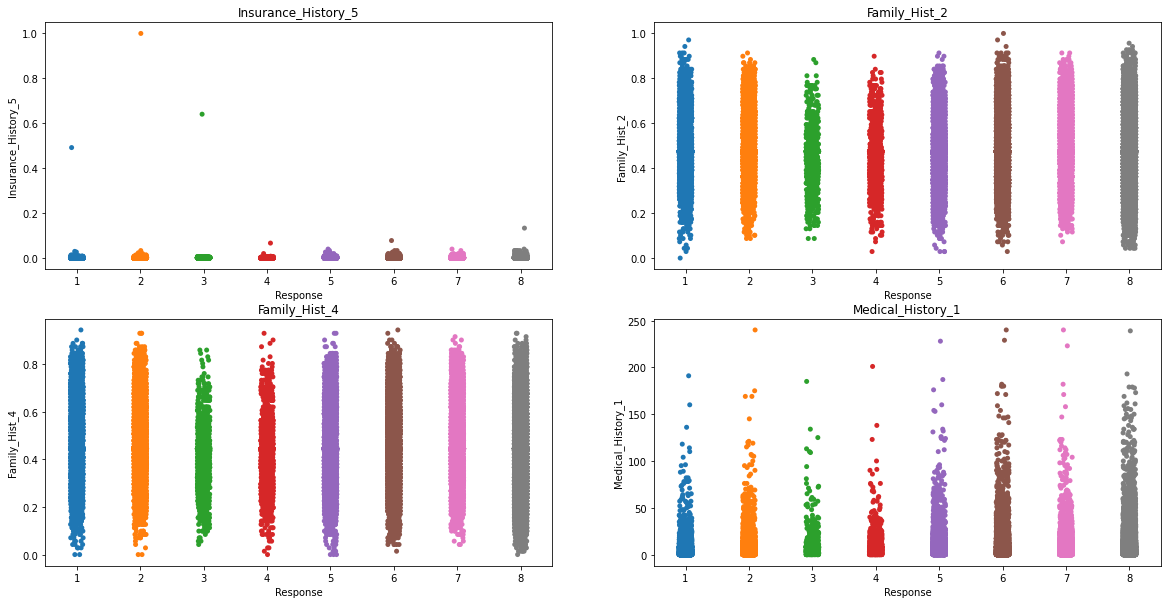

In [92]:
display_plots(bivariate_count,disc_columns,'Response')

Train Test split.

In [73]:
#deleting the id column and the categorical column as we have converted this to numerical.
customer_data=customer_data.drop(['Product_Info_2','Id'],axis=1)

In [74]:
#Taking X and y
X=customer_data.drop('Response',axis=1)
y=customer_data['Response']

In [78]:
y.value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

Class imbalance:Class 8 has highest number of records compared to other classes.

In [82]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto')
X_over_sample,y_over_sample=smote.fit_sample(X,y)

In [83]:
y_over_sample.value_counts()

8    19489
7    19489
6    19489
5    19489
4    19489
3    19489
2    19489
1    19489
Name: Response, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_over_sample,y_over_sample,test_size=0.3,stratify=y_over_sample)

In [114]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred=model_log.predict(x_test)

In [101]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[1511  812  759  576  276  292  744  877]
 [ 939 1219  700  667  378  381  695  868]
 [ 398  302 2637 2072   62  205  120   51]
 [ 212  118 1329 3469   30  358  183  147]
 [ 577  524  655  988  726  347  845 1185]
 [ 506  384  639 1292  184  728  798 1316]
 [ 435  178  375  590  337  417 1840 1675]
 [  88   75   88  328   82  291  301 4593]]


In [145]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.40      0.39      0.39      5847
           2       0.39      0.38      0.38      5847
           3       0.72      0.77      0.74      5847
           4       0.74      0.76      0.75      5846
           5       0.53      0.53      0.53      5847
           6       0.32      0.32      0.32      5847
           7       0.42      0.42      0.42      5847
           8       0.59      0.57      0.58      5846

    accuracy                           0.52     46774
   macro avg       0.51      0.52      0.51     46774
weighted avg       0.51      0.52      0.51     46774



In [139]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred=model_dt.predict(x_test)

<AxesSubplot:>

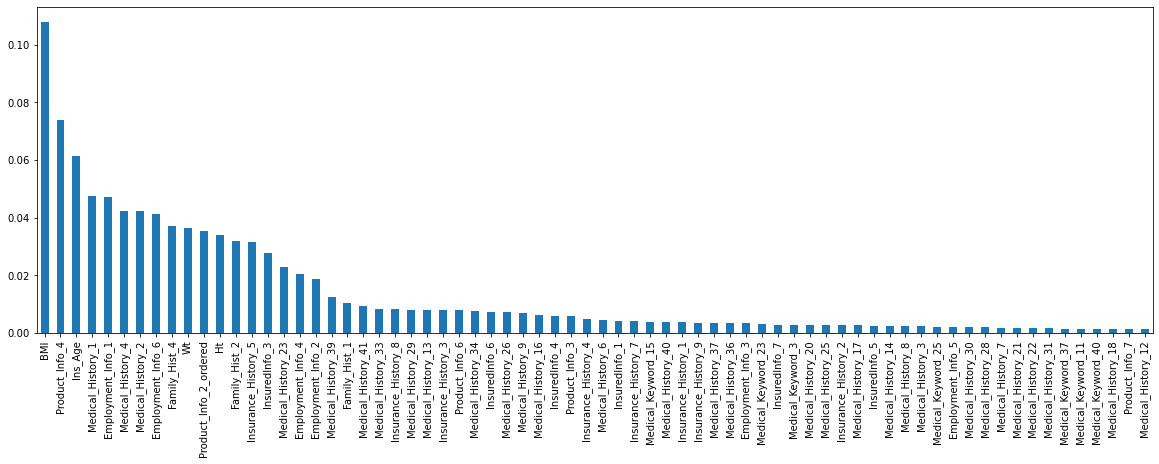

In [140]:
# get feature name and importance
features = pd.Series(model_dt.feature_importances_)
features.index = x_train.columns
# sort the features by importance
features.sort_values(ascending=False, inplace=True)
features=features[:70]
# plot
features.plot.bar(figsize=(20,6))

In [143]:
col_list=features.index.tolist()

In [144]:
#Lets use only these features for modelling and check if accuracy improves
model_dt.fit(x_train.loc[:,col_list],y_train)
y_pred=model_dt.predict(x_test.loc[:,col_list])

In [146]:
!pip install shap

In [148]:
import shap

In [ ]:
explainer = shap.Explainer(model_dt)
shap_values = explainer(X_over_sample)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])